<a href="https://colab.research.google.com/github/Davixino/Trabajo-Final/blob/main/An%C3%A1lisis_de_datos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TFM - Análisis de datos de accidentes tráfico en España





**NOMBRE**: Ronald Jiménez

##PREPROCESAMIENTO Y CALIDAD DE DATOS

## **LIBRERIAS**

Aplicar las librerias necesarias para el proceso de preprocesado y calidad de datos. 

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
%matplotlib inline
sns.set(style='darkgrid')
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

### ETAPA 1: INTEGRACION Y RECOPILACION DE DATOS 


Importar ficheros en formato xlsx

LEER DATOS INICIALES

In [ ]:
df = pd.read_excel("Dataset.xlsx") 

In [ ]:
df.shape

(72959, 75)

LEER DATOS DE COORDENADAS DE ESPAÑA

In [ ]:
df2 = pd.read_excel("coordenadas.xlsx") 

In [ ]:
df2.shape

(52, 7)

Fusionar dos datasets (DATOS INICIALES DGT Y DATOS DE COORDENADAS DE ESPAÑA)

In [ ]:
df_merge = pd.merge(df, df2, left_on='COD_PROVINCIA', right_on='Codigo')

Eliminar la instancia Geo Shape que no aporta información

In [ ]:
cols_to_drop = ['Geo Shape']
df_merge = df_merge.drop(cols_to_drop, axis=1)

LEER DATOS POSTALES DE ESPAÑA

In [ ]:
df_cod = pd.read_excel("codigos postales.xlsx") 

In [ ]:
df_cod.shape

(8107, 2)

Fusionar TRES datasets (DATOS INICIALES DGT, DATOS DE COORDENADAS Y DATOS POSTALES DE ESPAÑA)

In [ ]:
df_cod = pd.merge(df_merge, df_cod, left_on='COD_MUNICIPIO', right_on='Código Municipio')

### ETAPA 2: PREPROCESAMIENTO: LIMPIEZA DE DATOS

Ejecutar el conjunto de datos recopilados 

In [ ]:
from google.colab.data_table import DataTable
DataTable.max_columns = 100
df_cod

,SECUENCIAL,ID_ACCIDENTE,ANYO,MES,DIA_SEMANA,HORA,COD_PROVINCIA,COD_MUNICIPIO,ISLA,ZONA,...,ACERA,TRAZADO_PLANTA,Geo Point,CCAA,Cod_CCAA,Provincia,Texto,Codigo,Código Municipio,Municipio
0,3,202001002900213,2020,1,5,20,1,1002,NaN,1,...,998,2,"42.8351264353,-2.72060346921",País Vasco,16,Araba,Álava,1,1002,AMURRIO
1,4,202001002900757,2020,2,6,21,1,1002,NaN,1,...,998,3,"42.8351264353,-2.72060346921",País Vasco,16,Araba,Álava,1,1002,AMURRIO
2,5,202001002900789,2020,2,7,0,1,1002,NaN,1,...,998,1,"42.8351264353,-2.72060346921",País Vasco,16,Araba,Álava,1,1002,AMURRIO
3,6,202001002900841,2020,2,2,17,1,1002,NaN,1,...,998,2,"42.8351264353,-2.72060346921",País Vasco,16,Araba,Álava,1,1002,AMURRIO
4,7,202001002900957,2020,2,7,10,1,1002,NaN,1,...,998,2,"42.8351264353,-2.72060346921",País Vasco,16,Araba,Álava,1,1002,AMURRIO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63379,72955,202152001000006,2020,12,1,15,52,52001,NaN,3,...,998,998,"35.2908279949,-2.95053552337",Melilla,19,Melilla,Melilla,52,52001,MELILLA
63380,72956,202152001000007,2020,12,4,9,52,52001,NaN,3,...,4,998,"35.2908279949,-2.95053552337",Melilla,19,Melilla,Melilla,52,52001,MELILLA
63381,72957,202152001000008,2020,12,5,17,52,52001,NaN,3,...,4,998,"35.2908279949,-2.95053552337",Melilla,19,Melilla,Melilla,52,52001,MELILLA
63382,72958,202152001000009,2020,12,4,21,52,52001,NaN,3,...,4,998,"35.2908279949,-2.95053552337",Melilla,19,Melilla,Melilla,52,52001,MELILLA


Determinar la cantidad de registros y la instancia

In [ ]:
df_cod.shape

(63384, 83)

Analizar  el tipo de datos de cada variable

In [ ]:
df_cod.dtypes

SECUENCIAL           int64
ID_ACCIDENTE         int64
ANYO                 int64
MES                  int64
DIA_SEMANA           int64
                     ...  
Provincia           object
Texto               object
Codigo               int64
Código Municipio     int64
Municipio           object
Length: 83, dtype: object

Actualizar el tipo de datos de las variables

In [ ]:

df_cod = df_cod.infer_objects()

 Averiguar cuales son las variables cuantativas 

In [ ]:
df_numeric = df_cod.select_dtypes(include=[np.number])
numeric_cols = df_numeric.columns.values
print(numeric_cols)

['SECUENCIAL' 'ID_ACCIDENTE' 'ANYO' 'MES' 'DIA_SEMANA' 'HORA'
 'COD_PROVINCIA' 'COD_MUNICIPIO' 'ISLA' 'ZONA' 'ZONA_AGRUPADA' 'KM'
 'SENTIDO_1F' 'TITULARIDAD_VIA' 'TIPO_VIA' 'TIPO_ACCIDENTE' 'TOTAL_MU24H'
 'TOTAL_HG24H' 'TOTAL_HL24H' 'TOTAL_VICTIMAS_24H' 'TOTAL_MU30DF'
 'TOTAL_HG30DF' 'TOTAL_HL30DF' 'TOTAL_VICTIMAS_30DF' 'TOTAL_VEHICULOS'
 'TOT_PEAT_MU24H' 'TOT_BICI_MU24H' 'TOT_CICLO_MU24H' 'TOT_MOTO_MU24H'
 'TOT_TUR_MU24H' 'TOT_FURG_MU24H' 'TOT_CAM_MENOS3500_MU24H'
 'TOT_CAM_MAS3500_MU24H' 'TOT_BUS_MU24H' 'TOT_VMP_MU24H' 'TOT_OTRO_MU24H'
 'TOT_SINESPECIF_MU24H' 'TOT_PEAT_MU30DF' 'TOT_BICI_MU30DF'
 'TOT_CICLO_MU30DF' 'TOT_MOTO_MU30DF' 'TOT_TUR_MU30DF' 'TOT_FURG_MU30DF'
 'TOT_CAM_MENOS3500_MU30DF' 'TOT_CAM_MAS3500_MU30DF' 'TOT_BUS_MU30DF'
 'TOT_VMP_MU30DF' 'TOT_OTRO_MU30DF' 'TOT_SINESPECIF_MU30DF' 'NUDO'
 'NUDO_INFO' 'PRIORI_NORMA' 'PRIORI_AGENTE' 'PRIORI_SEMAFORO'
 'PRIORI_VERT_STOP' 'PRIORI_VERT_CEDA' 'PRIORI_HORIZ_STOP'
 'PRIORI_HORIZ_CEDA' 'PRIORI_MARCAS' 'PRIORI_PEA_NO_ELEV'
 'PRIOR

Averiguar cuales son las variables categóricas o cualitativas

In [ ]:
df_non_numeric = df_cod.select_dtypes(exclude=[np.number])
non_numeric_cols = df_non_numeric.columns.values
print(non_numeric_cols)

['CARRETERA' 'CARRETERA_CRUCE' 'Geo Point' 'CCAA' 'Provincia' 'Texto'
 'Municipio']


Se procede instalar la libreria missingno para detectar los valores anulos de todas las variables numéricas

In [ ]:
#!pip install missingno

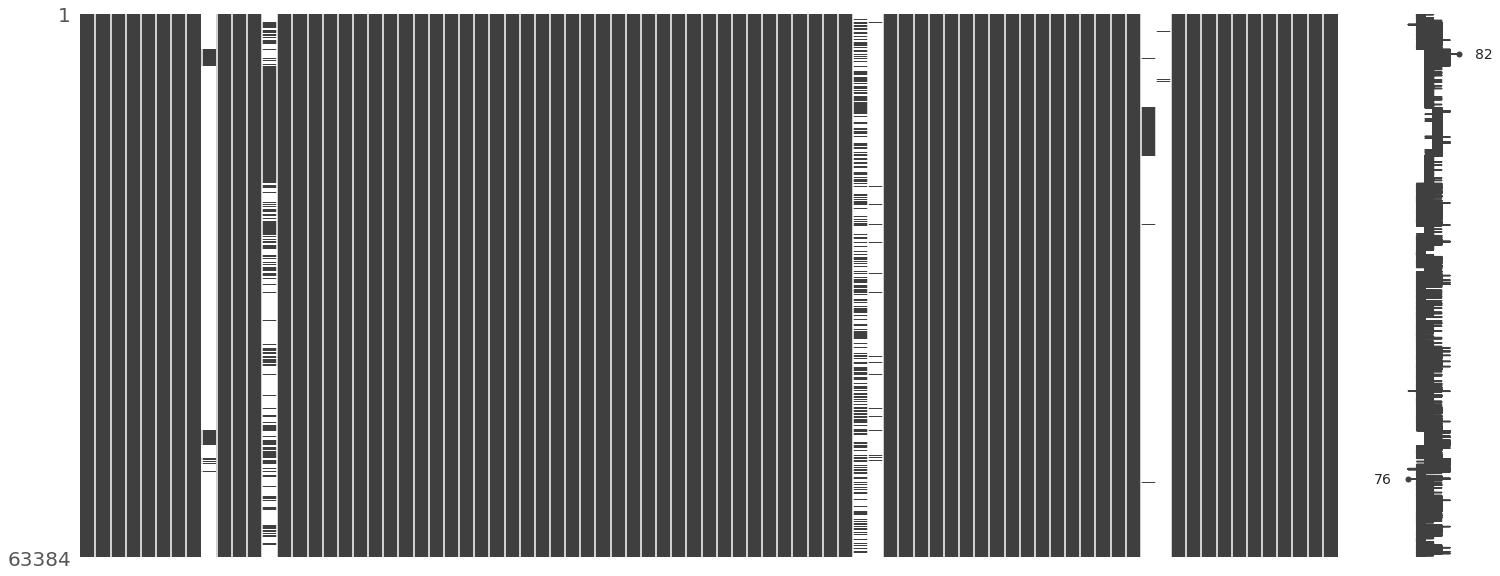

In [ ]:
import missingno as msno
msno.matrix(df_cod)

Se procede analizar la cantidad de valores faltantes de cada variable

In [ ]:
for col in df_cod.columns:
    pct_missing = np.mean(df_cod[col].isna().sum())
    print('{} - {}'.format(col, round(pct_missing)))

SECUENCIAL - 0
ID_ACCIDENTE - 0
ANYO - 0
MES - 0
DIA_SEMANA - 0
HORA - 0
COD_PROVINCIA - 0
COD_MUNICIPIO - 0
ISLA - 58955
ZONA - 0
ZONA_AGRUPADA - 0
CARRETERA - 0
KM - 33040
SENTIDO_1F - 0
TITULARIDAD_VIA - 0
TIPO_VIA - 0
TIPO_ACCIDENTE - 0
TOTAL_MU24H - 0
TOTAL_HG24H - 0
TOTAL_HL24H - 0
TOTAL_VICTIMAS_24H - 0
TOTAL_MU30DF - 0
TOTAL_HG30DF - 0
TOTAL_HL30DF - 0
TOTAL_VICTIMAS_30DF - 0
TOTAL_VEHICULOS - 0
TOT_PEAT_MU24H - 0
TOT_BICI_MU24H - 0
TOT_CICLO_MU24H - 0
TOT_MOTO_MU24H - 0
TOT_TUR_MU24H - 0
TOT_FURG_MU24H - 0
TOT_CAM_MENOS3500_MU24H - 0
TOT_CAM_MAS3500_MU24H - 0
TOT_BUS_MU24H - 0
TOT_VMP_MU24H - 0
TOT_OTRO_MU24H - 0
TOT_SINESPECIF_MU24H - 0
TOT_PEAT_MU30DF - 0
TOT_BICI_MU30DF - 0
TOT_CICLO_MU30DF - 0
TOT_MOTO_MU30DF - 0
TOT_TUR_MU30DF - 0
TOT_FURG_MU30DF - 0
TOT_CAM_MENOS3500_MU30DF - 0
TOT_CAM_MAS3500_MU30DF - 0
TOT_BUS_MU30DF - 0
TOT_VMP_MU30DF - 0
TOT_OTRO_MU30DF - 0
TOT_SINESPECIF_MU30DF - 0
NUDO - 33
NUDO_INFO - 36462
CARRETERA_CRUCE - 61802
PRIORI_NORMA - 0
PRIORI_AGENTE - 

Determinar valores faltantes en porcentaje de cada variable

In [ ]:
for col in df_cod.columns:
    pct_missing = np.mean(df_cod[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

SECUENCIAL - 0%
ID_ACCIDENTE - 0%
ANYO - 0%
MES - 0%
DIA_SEMANA - 0%
HORA - 0%
COD_PROVINCIA - 0%
COD_MUNICIPIO - 0%
ISLA - 93%
ZONA - 0%
ZONA_AGRUPADA - 0%
CARRETERA - 0%
KM - 52%
SENTIDO_1F - 0%
TITULARIDAD_VIA - 0%
TIPO_VIA - 0%
TIPO_ACCIDENTE - 0%
TOTAL_MU24H - 0%
TOTAL_HG24H - 0%
TOTAL_HL24H - 0%
TOTAL_VICTIMAS_24H - 0%
TOTAL_MU30DF - 0%
TOTAL_HG30DF - 0%
TOTAL_HL30DF - 0%
TOTAL_VICTIMAS_30DF - 0%
TOTAL_VEHICULOS - 0%
TOT_PEAT_MU24H - 0%
TOT_BICI_MU24H - 0%
TOT_CICLO_MU24H - 0%
TOT_MOTO_MU24H - 0%
TOT_TUR_MU24H - 0%
TOT_FURG_MU24H - 0%
TOT_CAM_MENOS3500_MU24H - 0%
TOT_CAM_MAS3500_MU24H - 0%
TOT_BUS_MU24H - 0%
TOT_VMP_MU24H - 0%
TOT_OTRO_MU24H - 0%
TOT_SINESPECIF_MU24H - 0%
TOT_PEAT_MU30DF - 0%
TOT_BICI_MU30DF - 0%
TOT_CICLO_MU30DF - 0%
TOT_MOTO_MU30DF - 0%
TOT_TUR_MU30DF - 0%
TOT_FURG_MU30DF - 0%
TOT_CAM_MENOS3500_MU30DF - 0%
TOT_CAM_MAS3500_MU30DF - 0%
TOT_BUS_MU30DF - 0%
TOT_VMP_MU30DF - 0%
TOT_OTRO_MU30DF - 0%
TOT_SINESPECIF_MU30DF - 0%
NUDO - 0%
NUDO_INFO - 58%
CARRETERA_CRUCE

Eliminar algunas variables que tiene gran cantidad de valores faltantes y que no aportan información util. Reemplazar los valores faltantes como Desconocido.

In [ ]:
df_cod.shape

(63384, 83)

Agrupar las categorias

In [ ]:
df_cod['CONDICION_VIENTO'].unique()

array([nan,  1.])

Reemplazar el valor de la columna

In [ ]:
df_cod["CONDICION_VIENTO"] = df_cod['CONDICION_VIENTO'].fillna('Desconocido')

Conocer más detalles de las categorias de la variable

In [ ]:
df_cod.groupby('CONDICION_VIENTO').size().fillna('Desconocido')

CONDICION_VIENTO
1.0              277
Desconocido    63107
dtype: int64

Eliminar la columnar porque hay 100 por ciento aproximadamente de valores faltantes

In [ ]:
df_cod.drop('CONDICION_VIENTO', axis = 1, inplace = True)
print(df_cod.shape)

(63384, 82)


Reemplazar el valor de la columna

In [ ]:
df_cod["CONDICION_NIEBLA"] = df_cod['CONDICION_NIEBLA'].fillna('Desconocido')
df_cod.groupby('CONDICION_NIEBLA').size().fillna('Desconocido')


CONDICION_NIEBLA
1.0             6009
2.0               80
Desconocido    57295
dtype: int64

In [ ]:
#df = df.drop(df[df['CONDICION_NIEBLA']=='NaN'].index)
#print(df.shape)

Reemplazar el valor de la columna

In [ ]:
df["NUDO_INFO"] = df['NUDO_INFO'].fillna('Desconocido')
df.groupby('NUDO_INFO').size().fillna('Desconocido')

NUDO_INFO
1.0            11474
2.0             8905
3.0               91
4.0             6182
5.0              855
6.0               19
7.0               48
8.0                1
9.0                3
10.0             363
11.0             179
12.0             374
999.0            373
Desconocido    44092
dtype: int64

Reemplazar el valor de la columna

In [ ]:
df["CARRETERA_CRUCE"] = df['CARRETERA_CRUCE'].fillna('Desconocido')
df.groupby('CARRETERA_CRUCE').size().fillna('Desconocido')

CARRETERA_CRUCE
0            4
1            3
2            1
12           1
71           1
            ..
ZA-L-2447    1
ZA-P-1304    1
ZA-P-1512    1
ZA-P-2641    1
ZA-V-2527    1
Length: 1136, dtype: int64

Reemplazar el valor de la columna

In [ ]:
df_cod["ISLA"] = df_cod['ISLA'].fillna('Desconocido')
df_cod.groupby('ISLA').size().fillna('Desconocido')

ISLA
0.0              120
1.0             1583
2.0               85
3.0              272
4.0               17
7.0             1386
8.0              171
9.0              102
10.0             650
11.0              41
13.0               2
Desconocido    58955
dtype: int64

Reemplazar el valor de la columna

In [ ]:
df_cod["KM"] = df_cod['KM'].fillna('Desconocido')
df_cod.groupby('KM').size().fillna('Desconocido')

KM
0.0              411
0.01              14
0.02               1
0.03               3
0.04               2
               ...  
1250.0             3
1251.0             5
1254.0             8
9999.0         11376
Desconocido    33040
Length: 4155, dtype: int64

Rellenar valores al azar a los variables que contienen porcentaje muy bajo de valores faltantes

Aplicar el método de *ffill* para reemplazar los valores al azar

In [ ]:
df_cod.fillna(method='ffill', inplace=True)
pd.isnull(df_cod).any()

SECUENCIAL          False
ID_ACCIDENTE        False
ANYO                False
MES                 False
DIA_SEMANA          False
                    ...  
Provincia           False
Texto               False
Codigo              False
Código Municipio    False
Municipio           False
Length: 82, dtype: bool

Como se puede observar que ya no existen valores nulos en el conjunto de datos

Posteriormente analizar algunas variables que contengan valores atípicos

In [ ]:
from google.colab.data_table import DataTable
DataTable.max_columns = 72
df_cod.describe()

,SECUENCIAL,ID_ACCIDENTE,ANYO,MES,DIA_SEMANA,HORA,COD_PROVINCIA,COD_MUNICIPIO,ZONA,ZONA_AGRUPADA,...,CONDICION_NIVEL_CIRCULA,CONDICION_FIRME,CONDICION_ILUMINACION,CONDICION_METEO,VISIB_RESTRINGIDA_POR,ACERA,TRAZADO_PLANTA,Cod_CCAA,Codigo,Código Municipio
count,63384.000000,6.338400e+04,63384.0,63384.000000,63384.000000,63384.000000,63384.000000,63384.000000,63384.000000,63384.000000,...,63384.000000,63384.000000,63384.000000,63384.000000,63384.000000,63384.000000,63384.000000,63384.000000,63384.000000,63384.000000
mean,36493.451455,2.020275e+14,2020.0,6.690947,3.828711,14.073899,23.682759,23768.551922,2.411918,1.711299,...,109.950145,1.480610,2.861842,2.252761,7.374416,901.973763,697.771646,8.323205,23.682759,23768.551922
std,21010.028895,2.413603e+10,0.0,3.623456,1.899911,5.302332,14.012778,14026.960155,0.906480,0.453162,...,308.489802,8.033517,30.445218,30.440907,31.480644,293.806792,457.051033,4.742833,14.012778,14026.960155
min,3.000000,2.020010e+14,2020.0,1.000000,1.000000,0.000000,1.000000,1002.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1002.000000
25%,17740.750000,2.020090e+14,2020.0,3.000000,2.000000,10.000000,8.000000,8191.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,998.000000,4.000000,4.000000,8.000000,8191.000000
50%,37574.500000,2.020281e+14,2020.0,7.000000,4.000000,14.000000,28.000000,28079.000000,3.000000,2.000000,...,2.000000,1.000000,1.000000,1.000000,1.000000,998.000000,998.000000,9.000000,28.000000,28079.000000
75%,54253.250000,2.020350e+14,2020.0,10.000000,5.000000,18.000000,35.000000,35009.000000,3.000000,2.000000,...,6.000000,1.000000,3.000000,1.000000,18.000000,998.000000,998.000000,13.000000,35.000000,35009.000000
max,72959.000000,2.021520e+14,2020.0,12.000000,7.000000,23.000000,52.000000,52001.000000,4.000000,2.000000,...,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,998.000000,19.000000,52.000000,52001.000000


Estos son las variables que tienen valores outliers:  ACERA, CONDICION_METEO, CONDICION_ILUMINACION, CONDICION_FIRME,CONDICION_NIVEL_CIRCULA, KM, VISIB_RESTRINGIDA_POR, TRAZADO_PLANTA

ELIMINACION: PRIORI_NORMA, PRIORI AGENTE, PRIORI_SEMAFORO, PRIORI_VERT_STOP, PRIORI_VERT_CEDA, DE TODAS LAS VARIANLES DE PRIORI

Eliminar las caracteristicas de algunas variables y eliminar instancia si tiene gran cantidad de valores anomalías 

Se procede a eliminar la información relacionada a las intersecciones, variables PRIORI

In [ ]:
priori = ['PRIORI_NORMA','PRIORI_AGENTE', 'PRIORI_SEMAFORO','PRIORI_VERT_STOP', 'PRIORI_VERT_CEDA', 'PRIORI_HORIZ_STOP', 'PRIORI_HORIZ_CEDA', 'PRIORI_MARCAS', 'PRIORI_PEA_NO_ELEV', 'PRIORI_PEA_ELEV', 
          'PRIORI_MARCA_CICLOS', 'PRIORI_CIRCUNSTANCIAL', 'PRIORI_OTRA']

Debido a que la cantidad de valores sin especificar representan 61.4% de los datos correspondientes a intersecciones no se especifican. 

In [ ]:
df_cod.drop(priori, axis = 1, inplace = True)
print(df_cod.shape)

(63384, 69)


Reemplazar el valor 999.0 en Desconocido

In [ ]:
df_cod['CONDICION_NIVEL_CIRCULA'] = df_cod['CONDICION_NIVEL_CIRCULA'].replace([999.0],'Desconocido')
df_cod.groupby('CONDICION_NIVEL_CIRCULA').size()

CONDICION_NIVEL_CIRCULA
1              27696
2               7132
3               2281
4                324
5                 48
6              19092
Desconocido     6811
dtype: int64

Reemplazar el valor 999.0 en Desconocido

In [ ]:
df_cod['CONDICION_FIRME'] = df_cod['CONDICION_FIRME'].replace([999.0],'Desconocido')
df_cod.groupby('CONDICION_FIRME').size()

CONDICION_FIRME
1              54598
2                477
3               6430
4                 91
5                 45
6                 13
7                277
8                638
9                811
Desconocido        4
dtype: int64

Reemplazar el valor 999.0 en Desconocido

In [ ]:
df_cod['CONDICION_ILUMINACION'] = df_cod['CONDICION_ILUMINACION'].replace([999.0],'Desconocido')
df_cod.groupby('CONDICION_ILUMINACION').size()


CONDICION_ILUMINACION
1              44060
2               2229
3               2068
4               9942
5               2192
6               2834
Desconocido       59
dtype: int64

Reemplazar el valor 999.0 en Desconocido

In [ ]:

df_cod['CONDICION_METEO'] = df_cod['CONDICION_METEO'].replace([999.0],'Desconocido')
df_cod.groupby('CONDICION_METEO').size()


CONDICION_METEO
1              54240
2               3323
3               3681
4                853
5                 35
6                 19
7               1174
Desconocido       59
dtype: int64

Reemplazar el valor 999.0 en Desconocido

In [ ]:
df_cod['VISIB_RESTRINGIDA_POR'] = df_cod['VISIB_RESTRINGIDA_POR'].replace([999.0],'Desconocido')
df_cod.groupby('VISIB_RESTRINGIDA_POR').size()


VISIB_RESTRINGIDA_POR
1              39997
2                705
3                114
4                785
5                720
6                730
7                  3
8                 18
9                794
10                50
11                74
12               236
13                 8
14                36
15                10
16                59
17               278
18             18707
Desconocido       60
dtype: int64

Conocer las categorias de la variable

In [ ]:
df_cod.groupby('ACERA').size()

ACERA
1        896
2          9
3        852
4       4365
998    54963
999     2299
dtype: int64

Reemplazar el valor 999.0 y 998.0 en Desconocido

In [ ]:
df_cod['ACERA'] = df_cod['ACERA'].replace([999.0],'Desconocido')
df_cod['ACERA'] = df_cod['ACERA'].replace([998.0],'Desconocido')
df_cod.groupby('ACERA').size()

ACERA
1                896
2                  9
3                852
4               4365
Desconocido    57262
dtype: int64

Reemplazar el valor 999.0 en Desconocido

In [ ]:
df_cod['TRAZADO_PLANTA'] = df_cod['TRAZADO_PLANTA'].replace([998.0],'Desconocido')
df_cod.groupby('TRAZADO_PLANTA').size()

TRAZADO_PLANTA
1               9855
2               3462
3               1821
4               3968
Desconocido    44278
dtype: int64

### ETAPA 4: MINERIA DE DATOS

# Distribución de Número total de cada variable:


*   TOTAL_MU24H: Especifica el número total de fallecidos registrados en el accidente, computados a 24 horas. Tipo numérico. 
*   TOTAL_HG24H: Especifica el número total de heridos hospitalizados registrados en el accidente, computados a 24 horas. Tipo numérico.
*   TOTAL_HL24H: Especifica el número total de heridos no hospitalizados registrados en el accidente, computados a 24 horas. Tipo numérico. 
*   TOTAL_HL24H: Especifica el número total de heridos no hospitalizados registrados en el accidente, computados a 24 horas. Tipo numérico. 
*   TOTAL_VICTIMAS_24H: Especifica el número total de víctimas (fallecidos+ heridos hospitalizados+ heridos. no hospitalizados) registrados en el accidente, computados a 24 horas. Tipo numérico. 





Función creada para generar porcentaje de cada barra del gráfico con categorias.

In [ ]:
def with_hue(ax, feature, Number_of_categories, hue_categories):
    a = [p.get_height() for p in ax.patches]
    patch = [p for p in ax.patches]
    for i in range(Number_of_categories):
        total = feature.value_counts().values[i]
        for j in range(hue_categories):
            percentage="{:.1f}%".format(100 * a[(j*Number_of_categories + i)]/total)
            x = patch[(j*Number_of_categories + i)].get_x() + patch[(j*Number_of_categories + i)].get_width() / 2 - 0.15
            y = patch[(j*Number_of_categories + i)].get_y() + patch[(j*Number_of_categories + i)].get_height() 
            ax.annotate(percentage, (x, y), size = 15)

Función creada para generar porcentaje de cada barra del gráfico sin categorias.

In [ ]:

def without_hue(ax, feature):
    total = len(feature)
    for p in ax.patches:
        percentage="{:.1f}%".format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y), size = 15)

Realizar análisis exploratorio del conjunto de datos.

**Cantidad de fallecidos en el año 2020 empleando registros por mes**

In [ ]:
df_2 = df_cod.drop(df_cod[df_cod['TOTAL_MU30DF']>=3].index)
print(df_2.shape)

(63374, 69)


Text(0.5, 1.0, 'FALLECIDOS DE ACUERDO A CANTIDAD DE OCUPANTES - AÑO 2020')

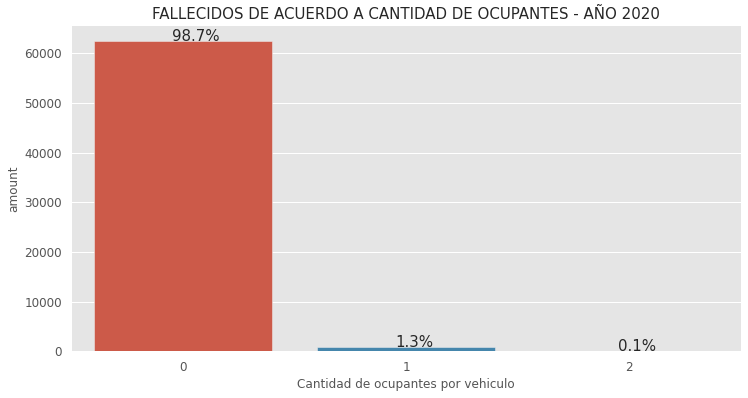

In [ ]:
#Distribución 
plt.figure(figsize=(12,6))
ax=sns.countplot(data = df_2  , x = 'TOTAL_MU30DF')
plt.xticks(size = 12)
plt.xlabel("Cantidad de ocupantes por vehiculo", size = 12)
plt.yticks(size = 12)
plt.ylabel('amount', size=12)
without_hue(ax, df_2.TOTAL_MU30DF)
plt.title('FALLECIDOS DE ACUERDO A CANTIDAD DE OCUPANTES - AÑO 2020',size=15)

La presente gráfica de barras, muestra la cantidad de fallecidos en el año 2002 empleando registros por mes. Se puede observar que el 98.6% corresponde a que la cantidad de personas fallecidas es de 0 ocupantes, mientras que el 1.3% corresponde a que la cantidad de personas fallecidas son de 1 ocupante y que el 0.1% corresponde a que la cantidad de personas fallecidas son de 2 ocupantes. Estos resultados son positivos porque no hubo un gran impacto de personas fallecidas en el año 2020

**Cantidad de heridos hospitalizados en el año 2020 empleando registros por mes**

In [ ]:
df_2 = df_cod.drop(df_cod[df_cod['TOTAL_HG30DF']>=3].index)
print(df_2.shape)

(63346, 69)


Text(0.5, 1.0, 'HERIDOS HOSPITALIZADOS DE ACUERDO A CANTIDAD DE OCUPANTES - AÑO 2020')

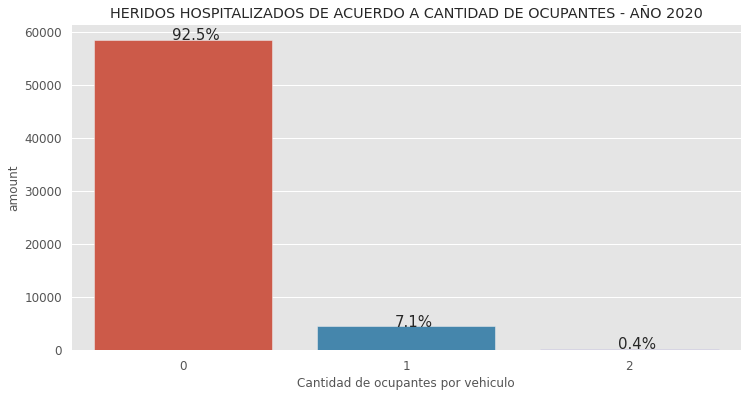

In [ ]:
#Distribución 
plt.figure(figsize=(12,6))
ax=sns.countplot(data = df_2, x = 'TOTAL_HG30DF')
plt.xticks(size = 12)
plt.xlabel("Cantidad de ocupantes por vehiculo", size = 12)
plt.yticks(size = 12)
plt.ylabel('amount', size=12)
without_hue(ax,df_2.TOTAL_HG30DF)

plt.title('HERIDOS HOSPITALIZADOS DE ACUERDO A CANTIDAD DE OCUPANTES - AÑO 2020')




La presente gráfica de barras, muestra la cantidad de heridos hospitalizados en el año 2002 empleando registros por mes. Se puede observar que el 92.4% de los encuestados, corresponde a que la cantidad de heridos hospitalizados es de 0 ocupantes, mientras que el 7,1% corresponde a que la cantidad de heridos hospitalizados es de 1 ocupantes. Está claro que la primera barra es mayor que la segunda barra de la cantidad de heridos hospitalizados. Estos resultados son positivos porque no hubo un gran impacto de heridos hospitalizados en el año 2020.  

**Cantidad de heridos no hospitalizados en el año 2020 empleando registros por mes**

In [ ]:
df_2 = df_cod.drop(df_cod[df_cod['TOTAL_HL30DF']>=5].index)
print(df_2.shape)

(62873, 69)


Text(0.5, 1.0, 'HERIDOS NO HOSPITALIZADOS DE ACUERDO A CANTIDAD DE OCUPANTES - AÑO 2020')

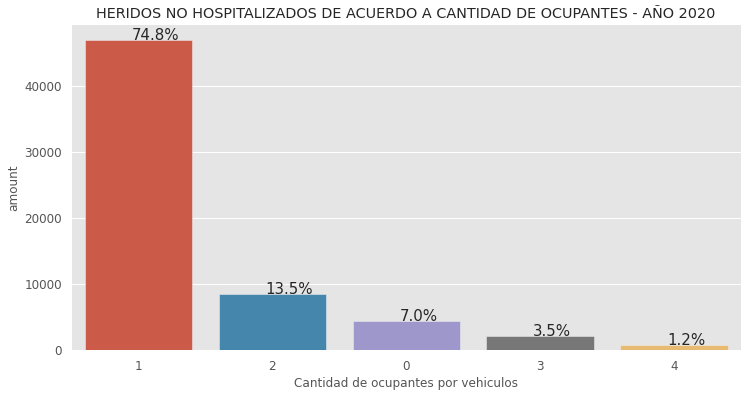

In [ ]:
#Distribución 
plt.figure(figsize=(12,6))
ax=sns.countplot(data = df_2, x = 'TOTAL_HL30DF',order = df_2['TOTAL_HL30DF'].value_counts().index)
plt.xticks(size = 12)
plt.xlabel("Cantidad de ocupantes por vehiculos", size = 12)
plt.yticks(size = 12)
plt.ylabel('amount', size=12)
without_hue(ax,df_2.TOTAL_HL30DF)

plt.title('HERIDOS NO HOSPITALIZADOS DE ACUERDO A CANTIDAD DE OCUPANTES - AÑO 2020')

La siguiente gráfica de barras muestra la cantidad de heridos no hospitalizados en el año 2002 empleando registros por mes. Se puede observar que el 73,8% de los encuestados, corresponde a que la cantidad de heridos no hospitalizados es de 1 ocupantes, mientras que 13,6%, corresponde a que la cantidad de heridos no hospitalizados es de 2 ocupantes. El 3,5 % corresponde a 3 ocupantes. El 0.5% corresponde a 4 ocupantes. El 7 % corresponde a 0 ocupantes. Está claro que la segunda barra es mayor que las demás barras de la cantidad de heridos hospitalizados. Estos resultados son negativos porque hay un gran impacto de heridos no hospitalizados en el año 2020.

**Cantidad de víctimas empleando registros por mes**

In [ ]:
df_2 = df_cod.drop(df_cod[df_cod['TOTAL_VICTIMAS_30DF']>=5].index)
print(df_2.shape)

(62793, 69)


Text(0.5, 1.0, 'CANTIDAD DE ACCIDENTES POR VÍCTIMAS SIMULTANEAS')

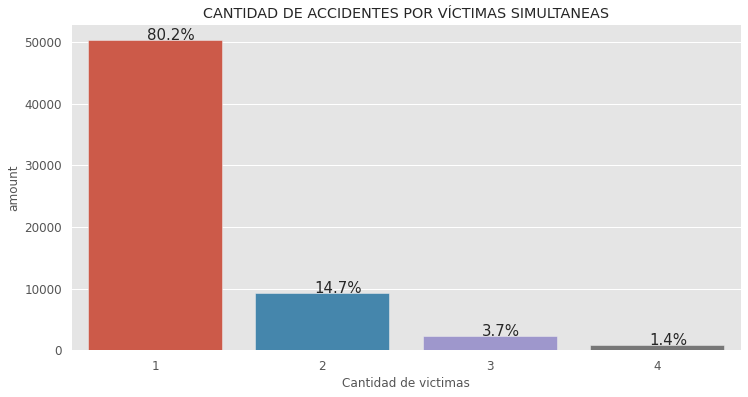

In [ ]:
#Distribución 
plt.figure(figsize=(12,6))
ax=sns.countplot(data = df_2 , x = 'TOTAL_VICTIMAS_30DF')
plt.xticks(size = 12)
plt.xlabel("Cantidad de victimas", size = 12)
plt.yticks(size = 12)
plt.ylabel('amount', size=12)
without_hue(ax,df_2.TOTAL_VICTIMAS_30DF)

plt.title('CANTIDAD DE ACCIDENTES POR VÍCTIMAS SIMULTANEAS')

La siguiente gráfica de barras muestra la cantidad de heridos hospitalizados en el año 2020 empleando registros por mes. Se puede observar que el 79,1% de los encuestados, corresponde a que la cantidad de víctimas es de 1 ocupantes, mientras que el 14,8% corresponde a que la cantidad de víctimas es de 1 ocupantes. El 3,8% corresponde a 3 ocupantes. El 1,4% corresponde a 4 ocupantes. Está claro que la primera barra es mayor que las demás barras de la cantidad de víctimas. Estos resultados son negativos porque se puede observar que hay un gran impacto de víctimas en el año 2020.  

**Cantidad de vehiculos implicados en el accidente**

In [ ]:
df_2 = df_cod.drop(df_cod[df_cod['TOTAL_VEHICULOS']>=5].index)
print(df_2.shape)

(63030, 69)


Text(0.5, 1.0, 'CANTIDAD DE VEHÍCULOS IMPLICADOS EN CADA ACCIDENTE')

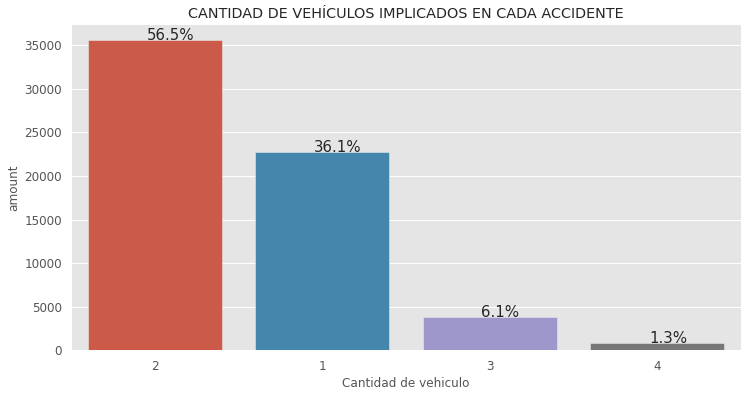

In [ ]:
#Distribución 
plt.figure(figsize=(12,6))
ax=sns.countplot(data = df_2 , x = "TOTAL_VEHICULOS",order = df_2 ['TOTAL_VEHICULOS'].value_counts().index)
plt.xticks(size = 12)
plt.xlabel("Cantidad de vehiculo", size = 12)
plt.yticks(size = 12)
plt.ylabel('amount', size=12)
without_hue(ax,df_2.TOTAL_VEHICULOS)


plt.title('CANTIDAD DE VEHÍCULOS IMPLICADOS EN CADA ACCIDENTE')

La siguiente gráfica de barras muestra la cantidad de vehículos implicados en el accidente en el año 2020. Se puede observar que el 38,8,1% de los encuestados, corresponde a que la cantidad de vehículos implicados es de 1 vehículo, mientras que el 56,1% corresponde a que la cantidad de vehículos implicados es de 2 vehículos implicados. El 6,2% corresponde a 3 vehículos implicados. El 1,4% corresponde a 4 vehículos implicados. Está claro que la segunda barra es mayor que las demás barras de la cantidad de vehículos implicados. Estos resultados son negativos porque se puede observar que hay un gran impacto de vehículos implicados de accidentes en el año 2020.  

TOTAL_VEHICULOS: Especifica el número total de vehículos implicados registrados en el accidente. Tipo numérico. 

En este caso presenta la segunda barra es mayor que las demas barrras de acuerdo de la distribucción generada. 

**Tipo de accidente ocurrido**

Text(0.5, 1.0, 'CANTIDAD DE ACCIDENTES SEGÚN SU TIPO')

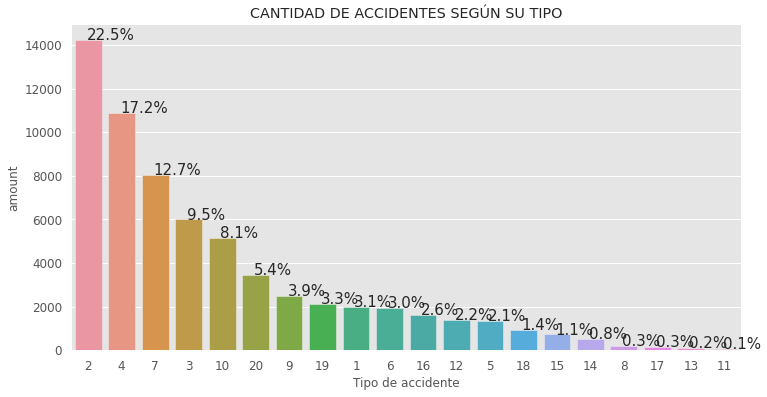

In [ ]:
#Distribución 
plt.figure(figsize=(12,6))
ax=sns.countplot(data = df_cod, x = "TIPO_ACCIDENTE",order = df_cod['TIPO_ACCIDENTE'].value_counts().index)
plt.xticks(size = 12)
plt.xlabel("Tipo de accidente", size = 12)
plt.yticks(size = 12)
plt.ylabel('amount', size=12)
without_hue(ax,df_cod.TIPO_ACCIDENTE)


plt.title('CANTIDAD DE ACCIDENTES SEGÚN SU TIPO')

Muestra los tipos de accidentes ocurridos en el año 2020. Para el primero denominado accidente “frontal” tenemos que se dio en un 3.1%, el segundo como “fronto-lateral” se dio en un 22.5%, el tercero como “lateral” se dio en un 9.5, el cuarto como “por alcance” se dio en un 17.2%, el quinto como “múltiple o en caravana” se dio en un 2.1%, el sexto como “colisión contra obstáculo o elemento de la vía” se dio en un 3.0%, el séptimo como “atropello a personas” se dio en un 12.7%, el octavo como “atropello a animales” se dio en un 0.3%, el noveno como “vuelco” se dio en un 3.9%, el décimo como “caída” se dio en un 8.1%, el onceavo como “solo salida de la vía” se dio en un 0.1%, el doceavo como “salida de la vía por la izquierda con colisión” se dio en un 2.2%, el treceavo como “salida de la vía por la izquierda con despeñamiento” se dio en un 0.2%, el catorceavo como “salida de la vía por la izquierda con vuelco” se dio en un 0.8%, el quinceavo como “salida de la vía por la izquierda, otro tipo” se dio en un 1.1%, el dieciseisavo como “salida de la vía por la derecha con colisión” se dio en un 2.6%, el diecisieteavo como “salida de la vía por la derecha con despeñamiento” se dio en un 0.3%, el dieciochoavo como “salida de la vía por la derecha con vuelco” se dio en un 1.4%, el diecinueveavo como “salida de la vía por la derecha, otro tipo” se dio en un 3.3%, y por último el veinteavo como “otro tipo de accidente” se dio en un 5.4%.

**Elementos que afectan a la visibilidad en el lugar de acccidente**

Text(0.5, 1.0, 'CANTIDAD DE ACCIDENTES SEGÚN ELEMENTOS QUE AFECTAN LA VISIBILIDAD')

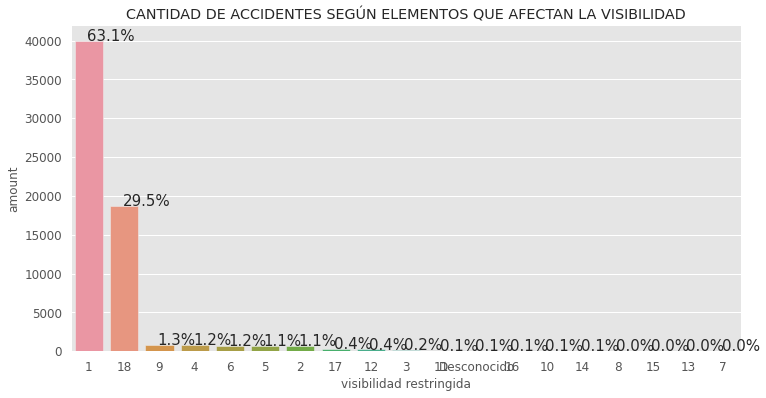

In [ ]:

#Distribución 
plt.figure(figsize=(12,6))
ax=sns.countplot(data = df_cod, x = "VISIB_RESTRINGIDA_POR",order = df_cod['VISIB_RESTRINGIDA_POR'].value_counts().index)
plt.xticks(size = 12)
plt.xlabel("visibilidad restringida", size = 12)
plt.yticks(size = 12)
plt.ylabel('amount', size=12)
without_hue(ax,df_cod.VISIB_RESTRINGIDA_POR)


plt.title('CANTIDAD DE ACCIDENTES SEGÚN ELEMENTOS QUE AFECTAN LA VISIBILIDAD')

La ilustración muestra los elementos que afectan a la visibilidad en el lugar del accidente es decir las causas por el cual se dio el mismo. Los accidentes con buena visibilidad se dieron en un 63.1%, los accidentes por visibilidad restringida por edificios se dieron en un 1.1%, por instalaciones o elementos en la vía se dieron en un 1.1%, por configuración del terreno se dieron en un 29.5%, por factores atmosféricos se dieron en un 1.2%, por deslumbramiento por el sol se dieron en un 1.2%, por factores atmosféricos se dieron en un 0.4%, por deslumbramiento por alumbrado artificial se dieron en un 0.4%, por deslumbramiento por faros de otro vehículo se dieron en un 1.2%, por vehículo (parado, en movimiento, aparcado) se dieron en un 1.3%, por obras se dieron en un 0.1%, por contenedores se dieron en un 0.2%, por vegetación o arboles se dieron en un 0.1%, por elementos decorativos se dieron en un 0.1%, por otros objetos en la vía se dieron en un 0.1%, por paneles y publicidad se dieron en un 0.0%, por elementos del vehículo (lunas…) se dieron en un 0.0%, , por otras restricciones se dieron en un 0.1%, por causas desconocidas se dieron en un 0%, y por ultimo sin especificar se dieron en un 0%.

### ETAPA 3: TRANSFORMACION





Realiza la transformacion de datos en categorias de cada columna.

In [ ]:
df_cod['ZONA_AGRUPADA'] = df_cod['ZONA_AGRUPADA'].map( {1: 'vías interurbanas', 
                                       2: 'vías urbanas',
                                        '':0} ).astype(str)

In [ ]:
df_cod['ZONA'] = df_cod['ZONA'].map( {1: 'carretera', 
                                       2: 'travesía',
                                      3: 'autopista',
                                      4: 'calle',
                                        '':0} ).astype(str)

In [ ]:
df_cod['SENTIDO_1F'] = df_cod['SENTIDO_1F'].map( {1: 'Ascendente', 
                                       2: 'Descendente',
                                      3: 'Ambos',
                                      4: 'Desconocido',
                                        '':0} ).astype(str)

In [ ]:

df_cod['TITULARIDAD_VIA'] = df_cod['TITULARIDAD_VIA'].map( {1: 'Estatal', 
                                       2: 'Autonómica',
                                      3: 'Provincial cabildo/Consell',
                                      4: 'Otra',
                                      5: 'Municipal',
                                        '':0} ).astype(str)

In [ ]:

df_cod['MES'] = df_cod['MES'].map( {1: 'Enero', 
                                       2: 'Febrero',
                                      3: 'Marzo',
                                      4: 'Abril',
                                      5: 'Mayo',
                                     6: 'Junio',
                                     7: 'Julio',
                                     8: 'Agosto',
                                    9: 'Septiembre',
                                    10: 'Octubre',
                                  11: 'Noviembre',
                                    12: 'Diciembre',
                                    
                                        '':0} ).astype(str)

In [ ]:
df_cod['CONDICION_NIEBLA'] = df_cod['CONDICION_NIEBLA'].map( {1: 'Niebla ligera', 
                                       2: 'Niebla intensa'} ).astype(str)

In [ ]:
df_cod['CONDICION_NIVEL_CIRCULA'] = df_cod['CONDICION_NIVEL_CIRCULA'].map( {1: 'Nivel Blanco: Circulación fluida y tráfico normal', 
                                       2: 'Nivel Verde: Circulación intensa',
                                       3: 'Nivel Amarillo: Circulación discontinua, detenciones intermitentes',
                                       4: 'Nivel Rojo: Carretera saturada, paradas intermitentes y prolongadas',
                                       5: 'Nivel Negro: Circulación interrumpida',
                                       6: 'Desconocido'
                                       } ).astype(str)

In [ ]:
df_cod['CONDICION_FIRME'] = df_cod['CONDICION_FIRME'].map( {1: 'Seco limpio', 
                                       2: 'Con barro',
                                       3: 'Mojado',
                                       4: 'inundado',
                                       5: 'Con hielo',
                                       6: 'Con nieve',
                                       7: 'Con aceite',
                                       8: 'Otra',
                                       9: 'Desconocido'
                                       } ).astype(str)

In [ ]:
df_cod['CONDICION_ILUMINACION'] = df_cod['CONDICION_ILUMINACION'].map( {1: 'Solar', 
                                       2: 'Amanec/atard, sin luz artificial',
                                       3: 'Amanec/atard, con luz artificial',
                                       4: 'Sin luz natural y con iluminación artificial encen',
                                       5: 'Sin luz natural y con iluminación artificial sin ence',
                                       6: 'Sin luz natural/artificial'
                                 
                                       } ).astype(str)

In [ ]:
df_cod['CONDICION_METEO'] = df_cod['CONDICION_METEO'].map( {1: 'Despejado', 
                                       2: 'Nublado',
                                       3: 'Lluvia debil',
                                       4: 'Lluvia fuerte',
                                       5: 'Granizado',
                                       6: 'Nevado',
                                       7: 'Desconocido'
                                 
                                       } ).astype(str)

**Cantidad de accidentes en Zona agrupada y Titularidad Via**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'CANTIDAD DE ACCIDENTES POR ZONA AGRUPADA Y TITULARIDAD VIA')

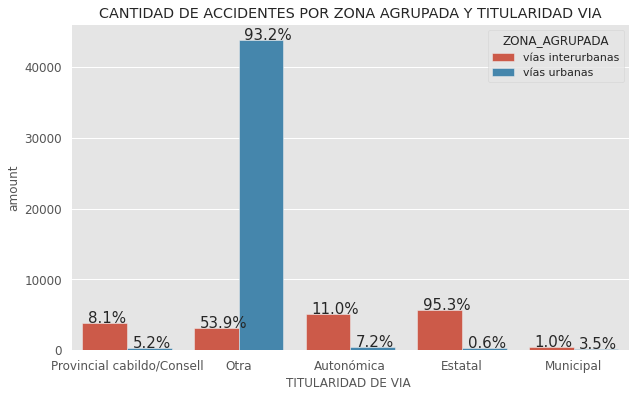

In [ ]:
plt.figure(figsize=(10,6))
ax=sns.countplot('TITULARIDAD_VIA', hue='ZONA_AGRUPADA',data=df_cod )
plt.xticks(size = 12)
plt.xlabel("TITULARIDAD DE VIA ", size = 12)
plt.yticks(size = 12)
plt.ylabel('amount', size=12)
with_hue(ax,df_cod.TITULARIDAD_VIA, 2,5)
plt.title('CANTIDAD DE ACCIDENTES POR ZONA AGRUPADA Y TITULARIDAD VIA')


*   ZONA_AGRUPADA: Especifica el número de Zona en la que ocurrió el accidente. Tipo numérico. 
 (Agregación de la Zona en 2 valores: vías interurbanas y vías urbanas)
*   TITULARIDAD_VIA: Especifica el número de Administración titular de la vía en la que ocurrió el accidente. Tipo numérico. 
(Agregación de titularidad de vía en 5 Valores: Estatal, Autonómica, Provincial cabil-do/Consell, Otra y Municipal


La Ilustración muestra la cantidad de accidentes en zonas agrupadas y de titularidad vial. Con respecto a vías interurbanas, la cantidad de accidentes en titularidad de vía provincial cabildo/consell es del 9.1%, en otra es del 55.6%, en la estatal es de 13.4%, en la autonómica es del 87.5% y en la municipal es del 0%. Asimismo, con respecto a vías urbanas, la cantidad de accidentes en la titularidad de vía provincial cabildo/consell es del 0%, en otra es del 100%, en la estatal es del 0%, en la autonómica es del 0% y en la municipal es del 0%.

**Cantidad de accidentes en Zona agrupada y sentido de la via**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'CANTIDAD DE ACCIDENTES POR ZONA AGRUPADA Y SENTIDO DE LA VIA')

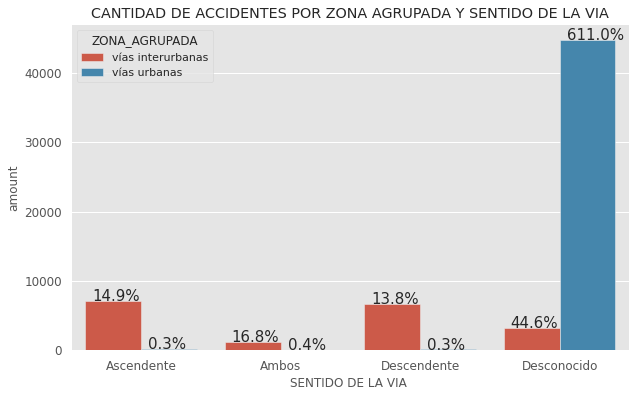

In [ ]:
plt.figure(figsize=(10,6))
ax=sns.countplot('SENTIDO_1F', hue='ZONA_AGRUPADA',data=df_cod )
plt.xticks(size = 12)
plt.xlabel("SENTIDO DE LA VIA ", size = 12)
plt.yticks(size = 12)
plt.ylabel('amount', size=12)
with_hue(ax,df_cod.SENTIDO_1F, 2,4)
plt.title('CANTIDAD DE ACCIDENTES POR ZONA AGRUPADA Y SENTIDO DE LA VIA')

La Ilustración muestra la cantidad de accidentes en zona agrupadas y zona. Con respecto a vías interurbanas la cantidad de accidentes en zona de carretera es del 47.0%, en autopista, travesía y calles es del 0%. Con respecto a vías urbanas la cantidad de accidentes en zona de carretera es del 0%, en autopista es del 99%, en travesía es del 1% y en calle del 0%.

*   ZONA_AGRUPADA: Especifica el número de Zona en la que ocurrió el accidente. Tipo numérico. 
 (Agregación de la Zona en 2 valores: vías interurbanas y vías urbanas)
*   SENTIDO_1F: Especifica el número de sentido de la vía donde ocurrió el accidente. Tipo numérico. 
(Agregación de Sentido 1F en 4 Valores: Ascendente, Descendente, Ambos, se desconoce)


TENDENCIA- En la zona agrupada (Vias urbanadas) que desconoce el sentido 1F




**Cantidad de accidentes en Zona agrupada y Zona**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'CANTIDAD DE ACCIDENTES POR ZONA AGRUPADA Y ZONA')

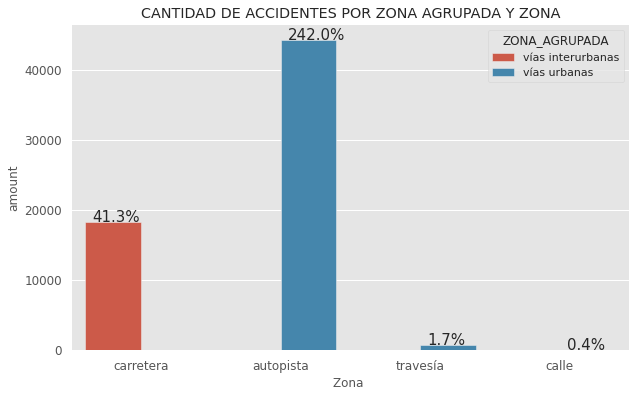

In [ ]:
plt.figure(figsize=(10,6))
ax=sns.countplot('ZONA', hue='ZONA_AGRUPADA',data=df_cod )
plt.xticks(size = 12)
plt.xlabel("Zona ", size = 12)
plt.yticks(size = 12)
plt.ylabel('amount', size=12)
with_hue(ax,df_cod.ZONA, 2,4
         )
plt.title('CANTIDAD DE ACCIDENTES POR ZONA AGRUPADA Y ZONA')

La Ilustración muestra la cantidad de accidentes en zonas agrupadas y sentido 1F. Con respecto a vías interurbanas, la cantidad de accidentes con sentido 1F ascendente es del 16.6%, la de ambos es del 16.8%, la de descendente es del 15.4% y la de desconocido es del 46.1%. Con respecto a vías urbanas la cantidad de accidentes con sentido 1F solo se presenta en el desconocido con un total del 100%.

In [ ]:
df_cod['CONDICION_NIEBLA'] = df_cod['CONDICION_NIEBLA'].replace(['nan'],'Desconocido')
df_cod.groupby('CONDICION_NIEBLA').size()

CONDICION_NIEBLA
Desconocido       57295
Niebla intensa       80
Niebla ligera      6009
dtype: int64

**Cantidad de accidentes mensuales de acuerdo a condición niebla**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'CANTIDAD DE ACCIDENTES POR MES DE ACUERDO A CONDICIÓN NIEBLA')

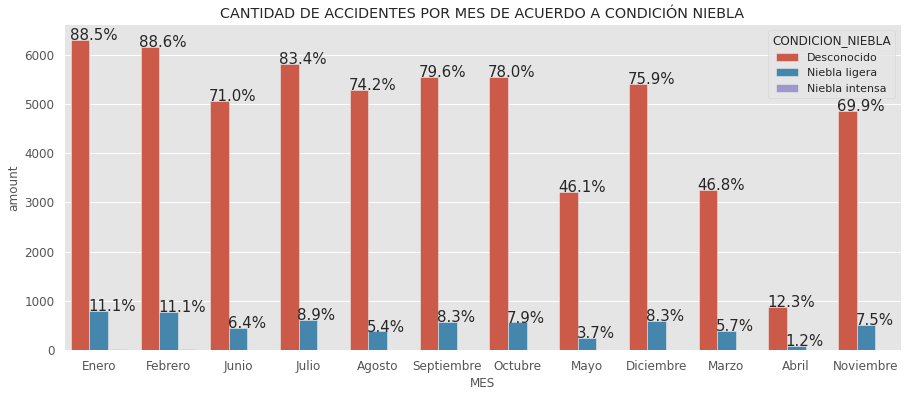

In [ ]:
plt.figure(figsize=(15,6))
ax=sns.countplot('MES', hue='CONDICION_NIEBLA',data=df_cod )
plt.xticks(size = 12)
plt.xlabel("MES", size = 12)
plt.yticks(size = 12)
plt.ylabel('amount', size=12)
with_hue(ax,df_cod.MES, 2,12)
plt.title('CANTIDAD DE ACCIDENTES POR MES DE ACUERDO A CONDICIÓN NIEBLA')

La ilustración muestra la cantidad de accidentes mensuales de acuerdo con la condición niebla. Para el mes de enero los accidentes con condición niebla desconocida o ausencia de niebla es del 88.5% y para niebla ligera es del 11.1%. Para el mes de febrero los accidentes con condición niebla desconocida es del 88.6% y para niebla ligera es del 11.1%. Para el mes de marzo los accidentes con condición niebla desconocida o ausencia de niebla es del 71.0% y para niebla ligera es del 6.4%. Para el mes de abril los accidentes con condición niebla desconocida o ausencia de niebla es del 83.4% y para niebla ligera es del 8.9%. Para el mes mayo los accidentes con condición niebla desconocida o ausencia de niebla es del 74.2% y para niebla ligera es del 5.4%. Para el mes de junio los accidentes con condición niebla desconocida o ausencia de niebla es del 79.6% y para niebla ligera es del 8.3%. Para el mes de julio los accidentes con condición niebla desconocida o ausencia de niebla es del 78.0% y para niebla ligera es del 7.9%. Para el mes de agosto los accidentes con condición niebla desconocida o ausencia de niebla es del 46.1% y para niebla ligera es del 3.7%. Para el mes de septiembre los accidentes con condición niebla desconocida o ausencia de niebla es del 75.9% y para niebla ligera es del 8.3%. Para el mes de octubre los accidentes con condición niebla desconocida o ausencia de niebla es del 46.8% y para niebla ligera es del 5.7%. Para el mes de noviembre los accidentes con condición niebla desconocida o ausencia de niebla es del 12.3% y para niebla ligera es del 1.2%. Y para el mes de diciembre los accidentes con condición niebla desconocida o ausencia de niebla es del 69.9% y para niebla ligera es del 7.5%. En conclusión, con la ausencia de niebla se dio el mayor porcentaje de accidentes llegando a alcanzar el 90%, y con que con niebla ligera no sobrepasa el 12% de accidentes.

In [ ]:
df_cod['CONDICION_NIVEL_CIRCULA'] = df_cod['CONDICION_NIVEL_CIRCULA'].replace(['nan'],'Desconocido')
df_cod.groupby('CONDICION_NIVEL_CIRCULA').size()

CONDICION_NIVEL_CIRCULA
Desconocido                                                            25903
Nivel Amarillo: Circulación discontinua, detenciones intermitentes      2281
Nivel Blanco: Circulación fluida y tráfico normal                      27696
Nivel Negro: Circulación interrumpida                                     48
Nivel Rojo: Carretera saturada, paradas intermitentes y prolongadas      324
Nivel Verde: Circulación intensa                                        7132
dtype: int64

**Cantidad de accidentes mensuales de acuerdo a condición nivel de circulación**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'CANTIDAD DE ACCIDENTES POR MES SEGÚN CONDICIÓN CIRCULACIÓN')

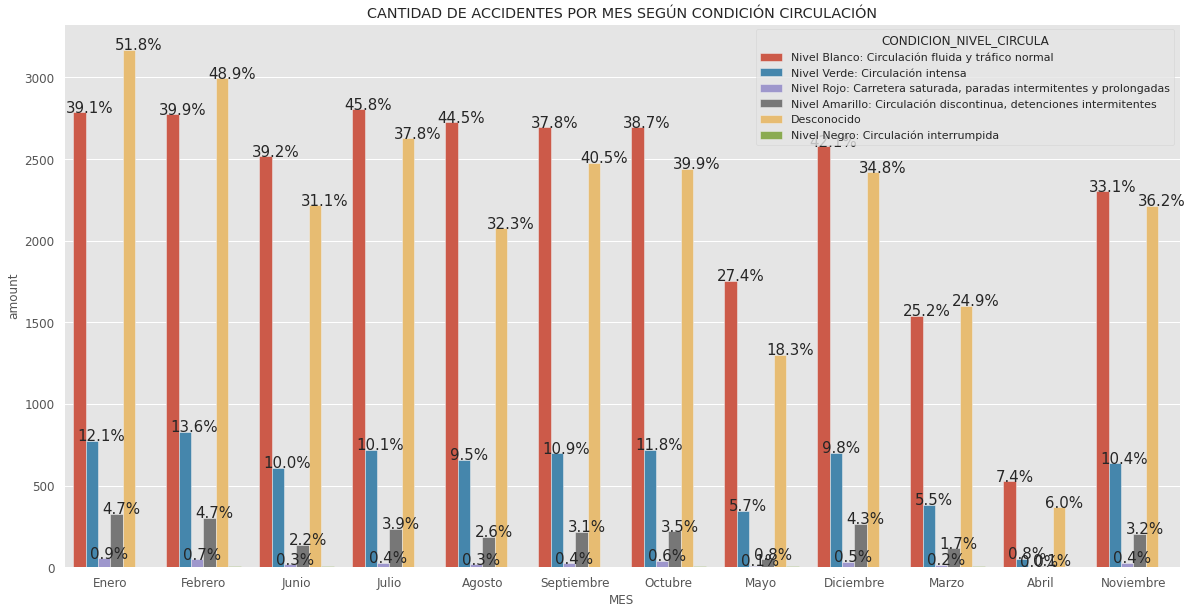

In [ ]:
#Distribución 
plt.figure(figsize=(20,10))
ax=sns.countplot('MES', hue='CONDICION_NIVEL_CIRCULA',data=df_cod )
plt.xticks(size = 12)
plt.xlabel("MES", size = 12)
plt.yticks(size = 12)
plt.ylabel('amount', size=12)
with_hue(ax,df_cod.MES, 5,12)
plt.title('CANTIDAD DE ACCIDENTES POR MES SEGÚN CONDICIÓN CIRCULACIÓN')

La ilustración muestra la cantidad de accidentes mensuales de acuerdo con la condición nivel de la circulación. En el mes de enero los accidentes por circulación fluida y trafico normal es del 39.1%, por circulación intensa es del 12.1%, por carretera saturada, paradas intermitentes y prolongadas es del 0.9%, por circulación discontinua, detenciones intermitentes es del 4.7%, y por condición desconocida es del 51.8%. En el mes de febrero los accidentes por circulación fluida y trafico normal es del 39.9%, por circulación intensa es del 13.6%, por carretera saturada, paradas intermitentes y prolongadas es del 0.7%, por circulación discontinua, detenciones intermitentes es del 4.7%, y por condición desconocida es del 48.9%. En el mes de marzo los accidentes por circulación fluida y trafico normal es del 39.2%, por circulación intensa es del 10.0%, por carretera saturada, paradas intermitentes y prolongadas es del 0.3%, por circulación discontinua, detenciones intermitentes es del 2.2%, y por condición desconocida es del 31.1%. En el mes de abril los accidentes por circulación fluida y trafico normal es del 45.8%, por circulación intensa es del 10.1%, por carretera saturada, paradas intermitentes y prolongadas es del 0.4%, por circulación discontinua, detenciones intermitentes es del 3.9%, y por condición desconocida es del 37.8%. En el mes de mayo los accidentes por circulación fluida y trafico normal es del 44.5%, por circulación intensa es del 9.5%, por carretera saturada, paradas intermitentes y prolongadas es del 0.3%, por circulación discontinua, detenciones intermitentes es del 2.6%, y por condición desconocida es del 32.3%. En el mes de junio los accidentes por circulación fluida y trafico normal es del 37.8%, por circulación intensa es del 10.9%, por carretera saturada, paradas intermitentes y prolongadas es del 0.4%, por circulación discontinua, detenciones intermitentes es del 3.1%, y por condición desconocida es del 40.5%. En el mes de julio los accidentes por circulación fluida y trafico normal es del 38.7%, por circulación intensa es del 11.8%, por carretera saturada, paradas intermitentes y prolongadas es del 0.6%, por circulación discontinua, detenciones intermitentes es del 3.5%, y por condición desconocida es del 39.9%. En el mes de agosto los accidentes por circulación fluida y trafico normal es del 27.4%, por circulación intensa es del 5.7%, por carretera saturada, paradas intermitentes y prolongadas es del 0.1%, por circulación discontinua, detenciones intermitentes es del 0.8%, y por condición desconocida es del 18.3%. En el mes de septiembre los accidentes por circulación fluida y trafico normal es del 42.1%, por circulación intensa es del 9.8%, por carretera saturada, paradas intermitentes y prolongadas es del 0.5%, por circulación discontinua, detenciones intermitentes es del 4.3%, y por condición desconocida es del 34.8%. En el mes de octubre los accidentes por circulación fluida y trafico normal es del 25.2%, por circulación intensa es del 5.5%, por carretera saturada, paradas intermitentes y prolongadas es del 0.2%, por circulación discontinua, detenciones intermitentes es del 1.7%, y por condición desconocida es del 24.9%. En el mes de noviembre los accidentes por circulación fluida y trafico normal es del 7.4%, por circulación intensa es del 0.8%, por carretera saturada, paradas intermitentes y prolongadas es del 0.0%, por circulación discontinua, detenciones intermitentes es del 0.1%, y por condición desconocida es del 6.0%. Y por último en el mes de diciembre los accidentes por circulación fluida y trafico normal es del 33.1%, por circulación intensa es del 10.4%, por carretera saturada, paradas intermitentes y prolongadas es del 0.4%, por circulación discontinua, detenciones intermitentes es del 3.2%, y por condición desconocida es del 36.2%.

In [ ]:
df_cod['CONDICION_FIRME'] = df_cod['CONDICION_FIRME'].replace(['nan'],'Desconocido')
df_cod.groupby('CONDICION_FIRME').size()

CONDICION_FIRME
Con aceite       277
Con barro        477
Con hielo         45
Con nieve         13
Desconocido      815
Mojado          6430
Otra             638
Seco limpio    54598
inundado          91
dtype: int64

**Cantidad de accidentes mensuales de acuerdo a condición firme**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'CANTIDAD DE ACCIDENTES POR MES SEGÚN CONDICIÓN FIRME')

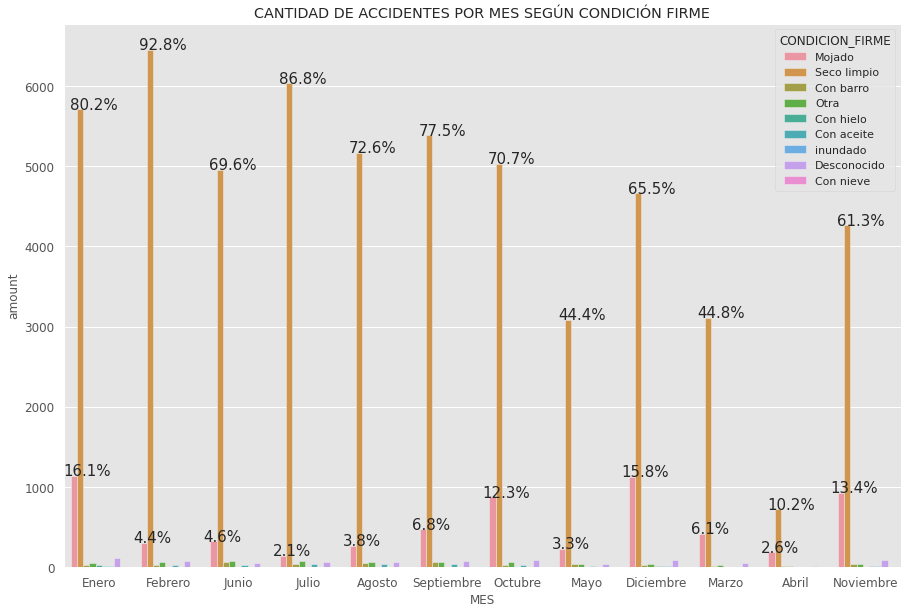

In [ ]:
#Distribución 
plt.figure(figsize=(15,10))
ax=sns.countplot('MES', hue='CONDICION_FIRME',data=df_cod )
plt.xticks(size = 12)
plt.xlabel("MES", size = 12)
plt.yticks(size = 12)
plt.ylabel('amount', size=12)
with_hue(ax,df_cod.MES, 2,12)
plt.title('CANTIDAD DE ACCIDENTES POR MES SEGÚN CONDICIÓN FIRME')

La ilustración  muestra la cantidad de accidentes mensuales de acuerdo con la condición firme del suelo. En el mes de enero los accidentes por suelo seco limpio son del 80.2% y para el suelo mojado son del 15.3%. En el mes de febrero los accidentes por suelo seco limpio son del 92.8% y para el suelo mojado son del 4.4%. En el mes de marzo los accidentes por suelo seco limpio son del 69.6% y para el suelo mojado son del 4.6%. En el mes de abril los accidentes por suelo seco limpio son del 86.8% y para el suelo mojado son del 2.1%. En el mes de mayo los accidentes por suelo seco limpio son del 72.6% y para el suelo mojado son del 3.8%. En el mes de junio los accidentes por suelo seco limpio son del 77.5% y para el suelo mojado son del 6.8%. En el mes de julio los accidentes por suelo seco limpio son del 70.7% y para el suelo mojado son del 12.3%. En el mes de agosto los accidentes por suelo seco limpio son del 44.4% y para el suelo mojado son del 3.3%. En el mes de septiembre los accidentes por suelo seco limpio son del 65.5% y para el suelo mojado son del 15.8%. En el mes de octubre los accidentes por suelo seco limpio son del 44.8% y para el suelo mojado son del 6.1%. En el mes de noviembre los accidentes por suelo seco limpio son del 10.2% y para el suelo mojado son del 2.6%. En el mes de diciembre los accidentes por suelo seco limpio son del 61.3% y para el suelo mojado son del 13.4%.

In [ ]:
df_cod['CONDICION_ILUMINACION'] = df_cod['CONDICION_ILUMINACION'].replace(['nan'],'Desconocido')
df_cod.groupby('CONDICION_ILUMINACION').size()

CONDICION_ILUMINACION
Amanec/atard, con luz artificial                          2068
Amanec/atard, sin luz artificial                          2229
Desconocido                                                 59
Sin luz natural y con iluminación artificial encen        9942
Sin luz natural y con iluminación artificial sin ence     2192
Sin luz natural/artificial                                2834
Solar                                                    44060
dtype: int64

**Cantidad de accidentes mensuales de acuerdo a condición iluminación**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'CANTIDAD DE ACCIDENTES POR MES SEGÚN CONDICIÓN ILUMINACIÓN')

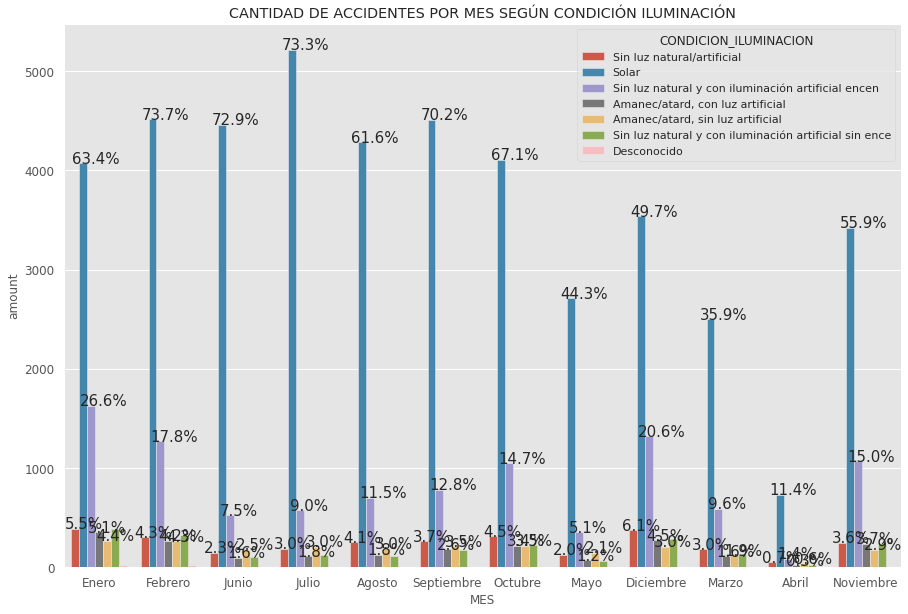

In [ ]:
#Distribución 
plt.figure(figsize=(15,10))
ax=sns.countplot('MES', hue='CONDICION_ILUMINACION',data=df_cod )
plt.xticks(size = 12)
plt.xlabel("MES", size = 12)
plt.yticks(size = 12)
plt.ylabel('amount', size=12)
with_hue(ax,df_cod.MES, 5,12)
plt.title('CANTIDAD DE ACCIDENTES POR MES SEGÚN CONDICIÓN ILUMINACIÓN')

In [ ]:
df_cod['CONDICION_METEO'] = df_cod['CONDICION_METEO'].replace(['nan'],'Desconocido')
df_cod.groupby('CONDICION_METEO').size()

CONDICION_METEO
Desconocido       1233
Despejado        54240
Granizado           35
Lluvia debil      3681
Lluvia fuerte      853
Nevado              19
Nublado           3323
dtype: int64

La ilustración muestra la cantidad de accidentes mensuales de acuerdo con la condición iluminación. En el mes de enero los accidentes con condición o iluminación solar son del 63.4% y sin luz natural o artificial son del 5.5%. En el mes de febrero los accidentes con condición o iluminación solar son del 73.7% y sin luz natural o artificial son del 4.3%. En el mes de marzo los accidentes con condición o iluminación solar son del 72.9% y sin luz natural o artificial son del 2.3%. En el mes de abril los accidentes con condición o iluminación solar son del 73.3% y sin luz natural o artificial son del 3%. En el mes de mayo los accidentes con condición o iluminación solar son del 61.6% y sin luz natural o artificial son del 4.1%. En el mes de junio los accidentes con condición o iluminación solar son del 70.2% y sin luz natural o artificial son del 3.7%. En el mes de julio los accidentes con condición o iluminación solar son del 67.1% y sin luz natural o artificial son del 4.5%. En el mes de agosto los accidentes con condición o iluminación solar son del 44.3% y sin luz natural o artificial son del 2.0%. En el mes de septiembre los accidentes con condición o iluminación solar son del 49.7% y sin luz natural o artificial son del 6.1%. En el mes de octubre los accidentes con condición o iluminación solar son del 35.9% y sin luz natural o artificial son del 3.0%. En el mes de noviembre los accidentes con condición o iluminación solar son del 11.4% y sin luz natural o artificial son del 0.7%. En el mes de diciembre los accidentes con condición o iluminación solar son del 55.9% y sin luz natural o artificial son del 3.6%.

**Cantidad de accidentes mensuales de acuerdo a condición meteo**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'CANTIDAD DE ACCIDENTES POR MES SEGÚN CONDICIÓN METEOROLOGÍA')

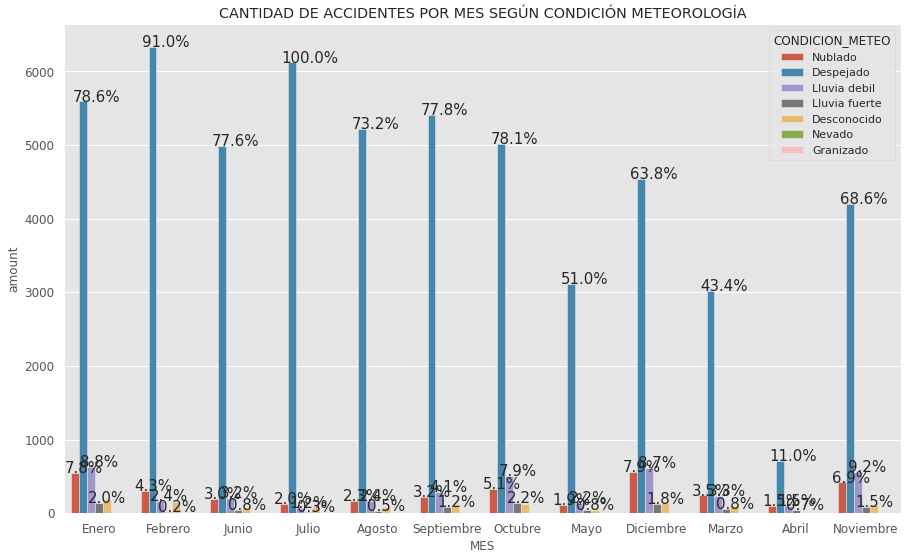

In [ ]:

plt.figure(figsize=(15,9))
ax=sns.countplot('MES', hue='CONDICION_METEO',data=df_cod )
plt.xticks(size = 12)
plt.xlabel("MES", size = 12)
plt.yticks(size = 12)
plt.ylabel('amount', size=12)
with_hue(ax,df_cod.MES, 4,12)
plt.title('CANTIDAD DE ACCIDENTES POR MES SEGÚN CONDICIÓN METEOROLOGÍA')


La ilustración muestra la cantidad de accidentes mensuales de acuerdo con condiciones meteorológicas. En el mes de enero los accidentes por condiciones meteorológicas de despejado son del 78.6% y para nublado son del 7.8%. En el mes de febrero los accidentes por condiciones meteorológicas de despejado son del 91.0% y para nublado son del 4.3%. En el mes de marzo los accidentes por condiciones meteorológicas de despejado son del 77.6% y para nublado son del 3.0%. En el mes de abril los accidentes por condiciones meteorológicas de despejado son del 100.0% y para nublado son del 2.0%. En el mes de mayo los accidentes por condiciones meteorológicas de despejado son del 73.2% y para nublado son del 2.3%. En el mes de junio los accidentes por condiciones meteorológicas de despejado son del 77.8% y para nublado son del 3.2%. En el mes de julio los accidentes por condiciones meteorológicas de despejado son del 78.1% y para nublado son del 5.1%. En el mes de agosto los accidentes por condiciones meteorológicas de despejado son del 51.0% y para nublado son del 1.9%. En el mes de septiembre los accidentes por condiciones meteorológicas de despejado son del 63.8% y para nublado son del 7.9%. En el mes de octubre los accidentes por condiciones meteorológicas de despejado son del 43.4% y para nublado son del 3.5%. En el mes de noviembre los accidentes por condiciones meteorológicas de despejado son del 11.0% y para nublado son del 1.5%. En el mes de diciembre los accidentes por condiciones meteorológicas de despejado son del 68.6% y para nublado son del 6.9%.

**Cantidad de accidentes por Mes**

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'CANTIDAD DE ACCIDENTES POR MES')

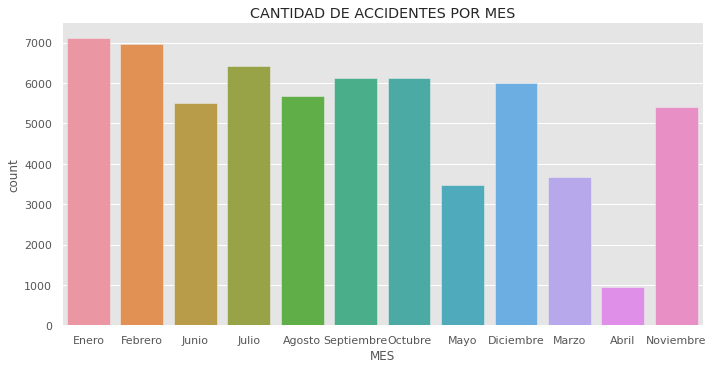

In [ ]:
sns.factorplot('MES',data=df_cod,kind="count", aspect=2)
plt.title('CANTIDAD DE ACCIDENTES POR MES')

MES: Especifica el mes en el que ocurrió el accidente. 

**Cantidad de accidentes por Hora**

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'CANTIDAD DE ACCIDENTES POR HORA')

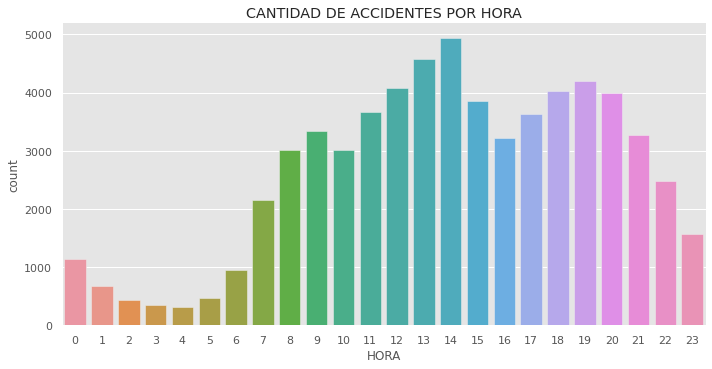

In [ ]:
sns.factorplot('HORA',data=df_cod,kind="count", aspect=2)
plt.title('CANTIDAD DE ACCIDENTES POR HORA')

SEMANA: Especifica el dia de la semana en el que ocurrió el accidente

**Cantidad de accidetes por Semana**

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'CANTIDAD DE ACCIDENTES POR SEMANA')

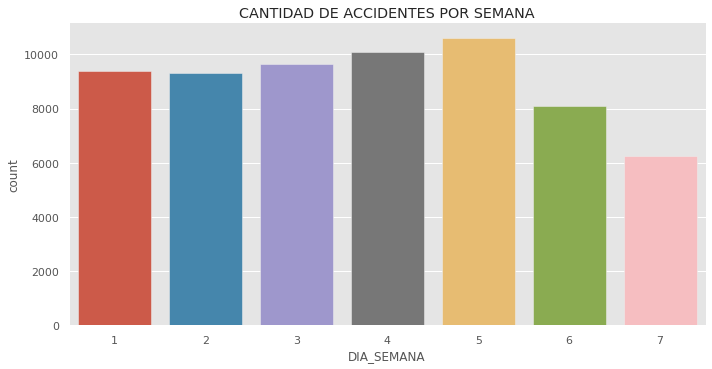

In [ ]:
sns.factorplot('DIA_SEMANA',data=df_cod,kind="count", aspect=2)
plt.title('CANTIDAD DE ACCIDENTES POR SEMANA')

HORA: Especifica la hora en la que ocurrió el accidente

Aproximadamente a las 2 pm ocurre mayor cantidad de accidente

En la Ilustración muestra que el horario de 7:00 a 23:00 es en el que se registran accidentes de tráfico.  Estos decesos ocurren, sobre todo, los días y todos los meses del año, excepto el mes Abril porque son feriados de santo y la Dirección General de Tráfico realiza un llamamiento a la prudencia de los conductores para mitigar los accidentes de tráfico. 

Descargar el conjunto de datos ya procesados para aplicar en otras herramientas

In [ ]:
#from google.colab import files

#with open('df3.csv', 'w') as f:
  #df_cod.to_csv(f,  index = False)
  
#files.download('df3.csv')

In [ ]:
#df_cod.to_excel('Datos modificados con desc.xlsx')

In [ ]:
MU_0 = df_cod["TOTAL_MU30DF"]==0
MU_1 = df_cod["TOTAL_MU30DF"]==1
MU_2 = df_cod["TOTAL_MU30DF"]==2

In [ ]:
VIC_0 = df_cod["TOTAL_HG30DF"]==0
VIC_1 = df_cod["TOTAL_HG30DF"]==1
VIC_2 = df_cod["TOTAL_HG30DF"]==2

In [ ]:
VI_0 = df_cod["TOTAL_HL30DF"]==0
VI_1 = df_cod["TOTAL_HL30DF"]==1
VI_2 = df_cod["TOTAL_HL30DF"]==2

In [ ]:
suma_vc0=VIC_0.sum()
suma_vc1=VIC_1.sum()
suma_vc2=VIC_2.sum()

In [ ]:
suma_mu0=MU_0.sum()
suma_mu1=MU_1.sum()
suma_mu2=MU_2.sum()

In [ ]:
suma_v0=VI_0.sum()
suma_v1=VI_1.sum()
suma_v2=VI_2.sum()

In [ ]:
personas_fallecidas = [suma_mu0, suma_mu1, suma_mu2 ]
heridos_hospitalizados = [suma_vc0, suma_vc1, suma_vc2 ]
heridos_no_hospitalizados = [suma_v0, suma_v1, suma_v2 ]


In [ ]:
#TOTAL_MU30DF - 0%
#TOTAL_HG30DF - 0%
#TOTAL_HL30DF - 0%
#TOTAL_VICTIMAS_30DF 

In [ ]:
from pandas import *

df = pd.DataFrame({'ocupantes': ['0 ocupante', '1 ocupante', '2 ocupantes' ],
                   'Personas fallecidas': [suma_mu0, suma_mu1, suma_mu2 ],
                   'heridos hospitalizados': [suma_vc0, suma_vc1, suma_vc2],
                   'heridos no hospitalizados':[suma_v0, suma_v1, suma_v2 ]
})




In [ ]:
df

,ocupantes,Personas fallecidas,heridos hospitalizados,heridos no hospitalizados
0,0 ocupante,62522,58576,4414
1,1 ocupante,819,4499,47017
2,2 ocupantes,33,271,8487


In [ ]:
def with_hue(ax, feature, Number_of_categories, hue_categories):
    a = [p.get_height() for p in ax.patches]
    patch = [p for p in ax.patches]
    for i in range(Number_of_categories):
        total = feature.value_counts().values[i]
        for j in range(hue_categories):
            percentage="{:.1f}".format(1 * a[(j*Number_of_categories + i)]/total)
            x = patch[(j*Number_of_categories + i)].get_x() + patch[(j*Number_of_categories + i)].get_width() / 2 - 0.15
            y = patch[(j*Number_of_categories + i)].get_y() + patch[(j*Number_of_categories + i)].get_height() 
            ax.annotate(percentage, (x, y), size = 15)

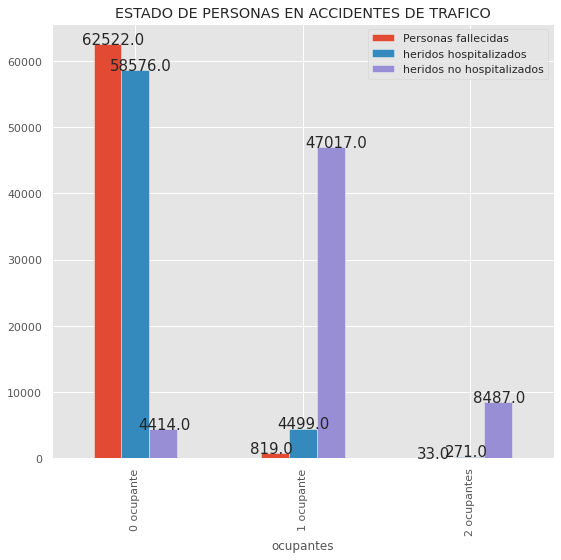

In [ ]:
df=pd.DataFrame(df ,columns=['Personas fallecidas','heridos hospitalizados', 'heridos no hospitalizados','ocupantes'])
ax=df.plot(x='ocupantes', y=['Personas fallecidas','heridos hospitalizados', 'heridos no hospitalizados'], kind="bar",figsize=(9,8))
with_hue(ax, df.ocupantes, 3,3)
plt.title('ESTADO DE PERSONAS EN ACCIDENTES DE TRAFICO')
plt.show()

In [ ]:
import plotly.express as px 

fig = px.pie(df, values="Personas fallecidas", names="ocupantes", title='PERSONAS FALLECIDAS', hole= .5) 
fig.update_traces( textfont_size=20
                  )
fig.show()


In [ ]:
import plotly.express as px 
fig = px.pie(df, values="heridos hospitalizados", names="ocupantes", title='HERIDOS HOSPITALIZADOS', hole= .5) 
fig.update_traces( textfont_size=20
                  )
fig.show()

In [ ]:

import plotly.express as px 
fig = px.pie(df, values="heridos no hospitalizados", names="ocupantes", title='HERIDOS NO HOSPITALIZADOS', hole= .5) 
fig.update_traces( textfont_size=20
                  )
fig.show()